Logistic Regression MAP classifier
==
## Simon Rogers, Feb 2017

In [3]:
import numpy as np
import pylab as plt
%matplotlib inline

Generate some data with two classes

In [18]:
x = np.random.randn(50,2)
x[:25,:] += 1.5
x[25:,:] += -1.5
t = np.zeros((50,1))
t[25:] += 1

Plot the data

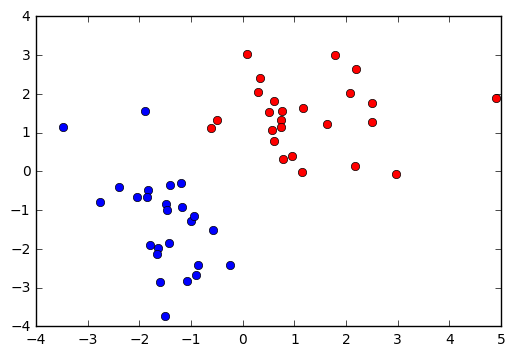

In [19]:
plt.figure()
styles = ['ro','bo']
classes = np.unique(t)
for i,classn in enumerate(classes):
    pos = np.where(t==classn)[0]
    plt.plot(x[pos,0],x[pos,1],styles[i])

Use Newton-Raphson to find the $\mathbf{w}$ that maximises the likelihood

In [23]:
sig_sq = 0.5 # prior variance for w (assuming mean zero)

In [42]:
def grad_function(w,x,t,sig_sq):
    P = 1.0/(1.0 + np.exp(-np.dot(x,w)))
    return (-1.0/sig_sq)*w + np.dot(x.T,t-P)

In [43]:
def hess_function(w,x,t,sig_sq):
    P = 1.0/(1.0 + np.exp(-np.dot(x,w)))
    P = P.flatten() # required for the diagonalisation
    return -(1.0/sig_sq)*np.eye(len(w)) - np.dot(x.T,np.dot(np.diag(P*(1-P)),x))

In [55]:
w = np.zeros((2,1)) #Â Initial guess

all_w = []
all_w.append(w.flatten())
for it in range(10):
    w = w - np.dot(np.linalg.inv(hess_function(w,x,t,sig_sq)),grad_function(w,x,t,sig_sq))
    all_w.append(w.flatten())

Plot the convergence of the w values

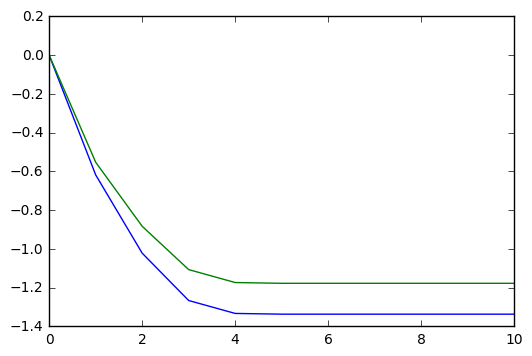

In [58]:
plt.figure()
all_w = np.array(all_w)
for i in range(2):
    plt.plot(all_w[:,i])


Plot the decision boundary. We will actually plot probability contours by making a big grid

In [64]:
gridX,gridY = np.meshgrid(np.arange(-5,5,1),np.arange(-6,5,1))

In [82]:
P = np.zeros_like(gridX,dtype=np.float)
for i,row in enumerate(gridX):
    for j,val in enumerate(row):
        pos_vec = np.vstack((val,gridY[i,j]))
        P[i][j] = (1.0/(1+np.exp(np.dot(-w.T,pos_vec))))

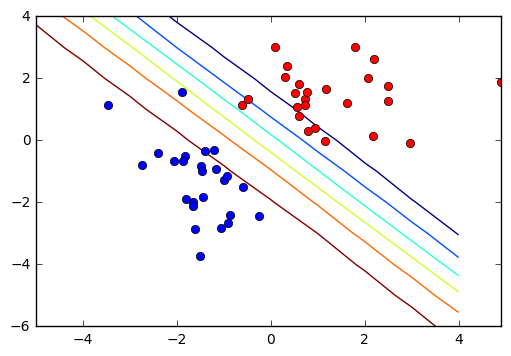

In [84]:
plt.figure()
for i,classn in enumerate(classes):
    pos = np.where(t==classn)[0]
    plt.plot(x[pos,0],x[pos,1],styles[i])
plt.contour(gridX,gridY,P)